## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [59]:
import numpy as np
def greaterThan(A, lower_lim):
    A_mask = A>lower_lim
    return(A*A_mask)




In [61]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

(9,)
(3, 2)
(3, 3)
You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [245]:
def subtractMean(A):
    check = []
    if len(np.shape(A)) > 1:
        sum = 0
        length = 0
        for row in A:
            for val in row:
                sum += val
            length += len(row)
        A_mean = sum / length
        for row in A:
            check_row = []
            for val in row:
                check_val = val - A_mean
                check_row.append(check_val)
            check.append(check_row)
    else:
        sum = 0
        for val in A:
            sum += val
        A_mean = sum / len(A)
        for val in A:
            val = val - A_mean
            check.append(val)
        
    return(check)

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [247]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [251]:
def arrayEdges(array):
    shape = np.shape(array)
    if len(shape) != 2:
        print("Error")
        return(-1)
    perim = (shape[0] * 2) + ((shape[1] -2) * 2)
    dA = array.dtype
    edges = np.zeros(perim).astype(dA)
    i = 0
    for val in array[0]:
        edges[i] = val
        i += 1
    display(edges)
    if shape[0] > 2:
        x = i
        for row in array:
            if x > (shape[0]):
                edges[i] = row[shape[1] - 1]
                i += 1
            x += 1
        display(edges)
        bottom = array[shape[0] - 1]
        bottom_edge = bottom[-2::-1].copy()
        display(bottom_edge)
        for val in bottom_edge:
            edges[i] = val
            i += 1
        display(edges)
        display(i)
    else:
        bottom = array[1]
        bottom_edge = bottom[-1::-1].copy()
        display(bottom_edge)
        for val in bottom_edge:
            edges[i] = val
            i += 1
        display(edges)
        display(i)
    left = []
    for row in array:
        left.append(row[0])
    left = left[-2::-1]
    for val in left:
        if i < len(edges):
            edges[i] = val
        i += 1
    display(edges)
    return(edges)
    

In [253]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")

array([1, 2, 3, 0, 0, 0, 0, 0])

array([1, 2, 3, 6, 9, 0, 0, 0])

array([8, 7])

array([1, 2, 3, 6, 9, 8, 7, 0])

7

array([1, 2, 3, 6, 9, 8, 7, 4])

array(['you', 'got', 'this', '0.0', '0.0', '0.0'], dtype='<U7')

array(['problem', 'correct', '!'], dtype='<U7')

array(['you', 'got', 'this', 'problem', 'correct', '!'], dtype='<U7')

6

array(['you', 'got', 'this', 'problem', 'correct', '!'], dtype='<U7')

Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [171]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - 342

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - 2700g
  - 6300g

 3. What species of penguins were recorded and how many of each?

 - Adelie - 151
 - Gentoo - 123
 - Chinstrap - 68

In [219]:
'''your code here'''
display(pp_df.tail())
print(len(pp_df) - 1)

display(pp_df.describe())
display(pp_df["species"].unique())
display(pp_df["species"].describe())
display((pp_df.query('species == "Gentoo"')).describe())
display((pp_df.query('species == "Chinstrap"')).describe())
display((pp_df.query('species == "Adelie"')).describe())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


343


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,123.000000,123.000000,123.000000,123.000000,124.000000
mean,47.504878,14.982114,217.186992,5076.016260,2008.080645
std,3.081857,0.981220,6.484976,504.116237,0.792206
min,40.900000,13.100000,203.000000,3950.000000,2007.000000
25%,45.300000,14.200000,212.000000,4700.000000,2007.000000
50%,47.300000,15.000000,216.000000,5000.000000,2008.000000
75%,49.550000,15.700000,221.000000,5500.000000,2009.000000
max,59.600000,17.300000,231.000000,6300.000000,2009.000000


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235,2007.970588
std,3.339256,1.135395,7.131894,384.335081,0.863360
min,40.900000,16.400000,178.000000,2700.000000,2007.000000
25%,46.350000,17.500000,191.000000,3487.500000,2007.000000
50%,49.550000,18.450000,196.000000,3700.000000,2008.000000
75%,51.075000,19.400000,201.000000,3950.000000,2009.000000
max,58.000000,20.800000,212.000000,4800.000000,2009.000000


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,151.000000,151.000000,151.000000,151.000000,152.000000
mean,38.791391,18.346358,189.953642,3700.662252,2008.013158
std,2.663405,1.216650,6.539457,458.566126,0.821780
min,32.100000,15.500000,172.000000,2850.000000,2007.000000
25%,36.750000,17.500000,186.000000,3350.000000,2007.000000
50%,38.800000,18.400000,190.000000,3700.000000,2008.000000
75%,40.750000,19.000000,195.000000,4000.000000,2009.000000
max,46.000000,21.500000,210.000000,4775.000000,2009.000000


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

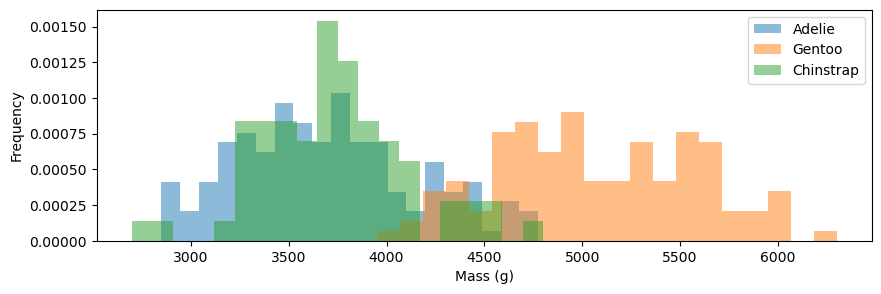

In [227]:
'''your code here'''
Adelie_mass = (pp_df.query('species == "Adelie"'))["body_mass_g"]
Gentoo_mass = (pp_df.query('species == "Gentoo"'))["body_mass_g"]
Chinstrap_mass = (pp_df.query('species == "Chinstrap"'))["body_mass_g"]

import matplotlib.pyplot as plt
plot_ops = dict(histtype = 'stepfilled', bins = 20, density = True, alpha = 0.5)

fig, ax = plt.subplots(1,1, figsize = (10,3))
ax.hist(Adelie_mass, **plot_ops, label = 'Adelie')
ax.hist(Gentoo_mass, **plot_ops, label = 'Gentoo')
ax.hist(Chinstrap_mass, **plot_ops, label = 'Chinstrap')

ax.set_ylabel('Frequency')
ax.set_xlabel('Mass (g)')
ax.legend()
plt.show()

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [1]:
'''your code here'''
    
